<a href="https://colab.research.google.com/github/niksbamne/Coursera_Capstone/blob/master/Travel_Review_Marketing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**


* Nowadays people love travelling to different places based on their interest with their family and friends. This project mainly focuses on the application of the Travel recommendation system and cluster analysis.
* Based on the cluster analysis, Companies can focus on different clusters to increase their Revenue.
* We chose a dataset from kaggle which has information on the various ratings of users on various categories across the Europe to specify the group of users based on their similarity of their interest using different cluster analysis.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
df_review = pd.read_csv('/content/Travel Review Rating Dataset/google_review_ratings.csv')
df_review.head(17)

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
5,User 6,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
6,User 7,0.0,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
7,User 8,0.0,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,0.60,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
8,User 9,0.0,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,...,0.60,0.0,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
9,User 10,0.0,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,...,0.59,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN


In [4]:
# Renaming the columns for better understanding
column_names = ['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens','Unnamed: 25']
df_review.columns = column_names

In [5]:
df_review.head(17)

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
0,User 1,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
5,User 6,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
6,User 7,0.0,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
7,User 8,0.0,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,0.60,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
8,User 9,0.0,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,...,0.60,0.0,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
9,User 10,0.0,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,...,0.59,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN


In [6]:
# checking the dimensions of the data 
df_review.shape

(5456, 26)

In [7]:
# checking for the datatypes 
df_review.dtypes

User                      object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
Unnamed: 25              float64
dtype: object

In [8]:
df_review['local_services'].value_counts()

5        1046
1.56       80
1.58       75
1.76       67
1.75       66
         ... 
3.84        1
2\t2.       1
3.82        1
3.18        1
3.54        1
Name: local_services, Length: 296, dtype: int64

In [9]:
df_review['local_services'][df_review['local_services'].index == 2712]

2712    2\t2.
Name: local_services, dtype: object

In [10]:
df_review['local_services'][df_review['local_services'] == '2\t2.']

2712    2\t2.
Name: local_services, dtype: object

In [12]:
df_review['local_services'] = df_review['local_services'].replace('2\t2.',2)

In [13]:
df_review['local_services'] = pd.to_numeric(df_review['local_services'])
df_review.dtypes

User                      object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
Unnamed: 25              float64
dtype: object

In [14]:
df_review.describe(include='all')

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
count,5456,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
unique,5456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,NaN,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,NaN,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,NaN,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,NaN,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,NaN,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000


In [15]:
#checking for duplicates in dataset
df_review[df_review.duplicated()]

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25


In [16]:
Total = df_review.isnull().sum().sort_values(ascending=False)          

Percent = (df_review.isnull().sum()*100/df_review.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Unnamed: 25,5454,99.963343
gardens,1,0.018328
burger_pizza_shops,1,0.018328
juice_bars,0,0.000000
monuments,0,0.000000
view_points,0,0.000000
cafes,0,0.000000
beauty_spas,0,0.000000
bakeries,0,0.000000
gyms,0,0.000000


In [17]:
# Removing insificicant variable
df_review.drop('Unnamed: 25',axis=1,inplace=True)
df_review.head()


,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [18]:
df_review['gardens'].mean()


1.560755270394134

In [19]:

df_review['gardens'].replace(np.nan,df_review['gardens'].mean(),inplace=True)

In [20]:
df_review['burger_pizza_shops'].mean()


2.078339138405133

In [21]:
df_review['burger_pizza_shops'].replace(np.nan,df_review['burger_pizza_shops'].mean(),inplace=True)

Total = df_review.isnull().sum().sort_values(ascending=False)          

Percent = (df_review.isnull().sum()*100/df_review.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
User,0,0.0
hotels_other_lodgings,0,0.0
monuments,0,0.0
view_points,0,0.0
cafes,0,0.0
beauty_spas,0,0.0
bakeries,0,0.0
gyms,0,0.0
swimming_pools,0,0.0
dance_clubs,0,0.0


In [22]:
df = df_review.copy()
df_review = df_review.drop(['User'],1)

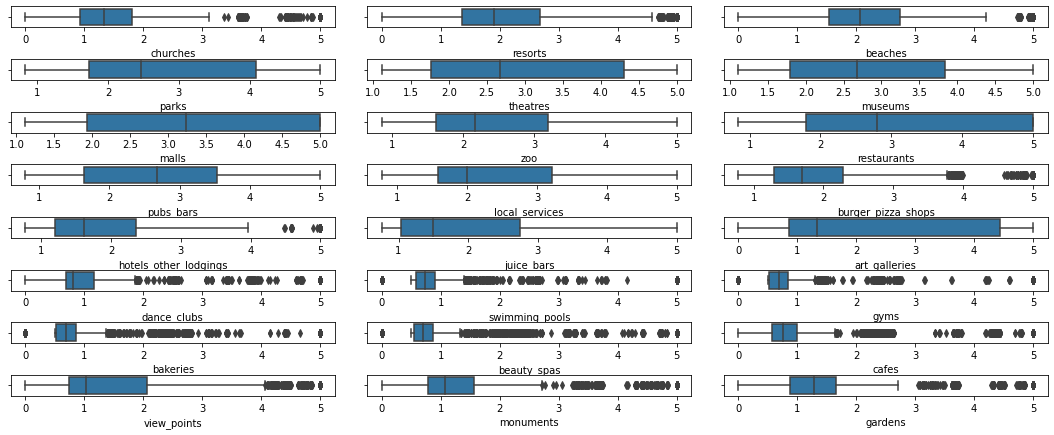

In [23]:
fig, ax = plt.subplots(nrows = 8, ncols = 3, figsize=(15, 6))

plt.tight_layout()

for variable, subplot in zip(df_review.columns, ax.flatten()):
    
 
    sns.boxplot(df_review[variable], ax = subplot)

# display the plot
plt.show()

In [24]:
#### Interpretation:There are many outliers in Dataset and can be removed.

Q1 = df_review[['churches','resorts','beaches','burger_pizza_shops','hotels_other_lodgings','dance_clubs','swimming_pools','gyms','bakeries','beauty_spas','cafes','view_points','monuments','gardens']].quantile(0.25)

Q3 = df_review[['churches','resorts','beaches','burger_pizza_shops','hotels_other_lodgings','dance_clubs','swimming_pools','gyms','bakeries','beauty_spas','cafes','view_points','monuments','gardens']].quantile(0.75)

IQR = Q3-Q1

IQR

churches                 0.8900
resorts                  1.3225
beaches                  1.2000
burger_pizza_shops       0.9925
hotels_other_lodgings    1.1700
dance_clubs              0.4700
swimming_pools           0.3300
gyms                     0.3100
bakeries                 0.3400
beauty_spas              0.3200
cafes                    0.4300
view_points              1.3300
monuments                0.7700
gardens                  0.7800
dtype: float64

In [25]:
df_iqr = df_review[~((df_review < (Q1 - 1.5 * IQR)) | (df_review > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.shape

(686, 24)

Interpretation: Let consider the data with oulier values, as the number of rows are reducing very much after removing outliers.


In [27]:
df_popularity_table = pd.DataFrame(df_review.mean(),columns=['Average Rating'])
df_popularity_table['TotalRatingCount'] = df_review.astype(bool).sum(axis=0).values

In [28]:
bar = df_popularity_table.sort_values(by=['TotalRatingCount'],ascending=True)
df_popularity_table

,Average Rating,TotalRatingCount
churches,1.455720,5261
resorts,2.319707,5366
beaches,2.489331,5452
parks,2.796886,5456
theatres,2.958941,5456
museums,2.893490,5456
malls,3.351395,5456
zoo,2.540795,5456
restaurants,3.126019,5456
pubs_bars,2.832729,5456


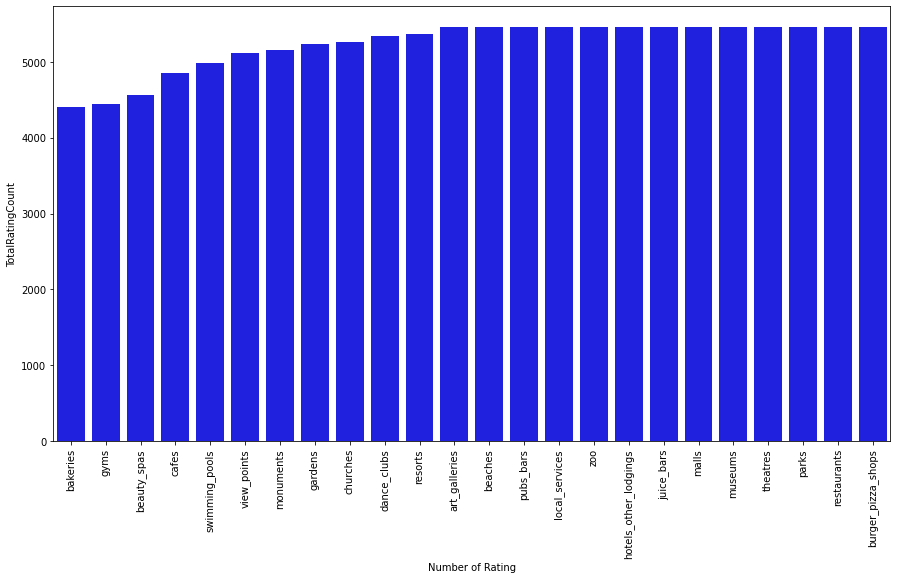

In [29]:
# Barplot based on total number of rating
plt.figure(figsize=(15,8))
sns.barplot(bar.index,bar.TotalRatingCount,color= 'blue',orient='v')
plt.xlabel('Number of Rating')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Average Rating')

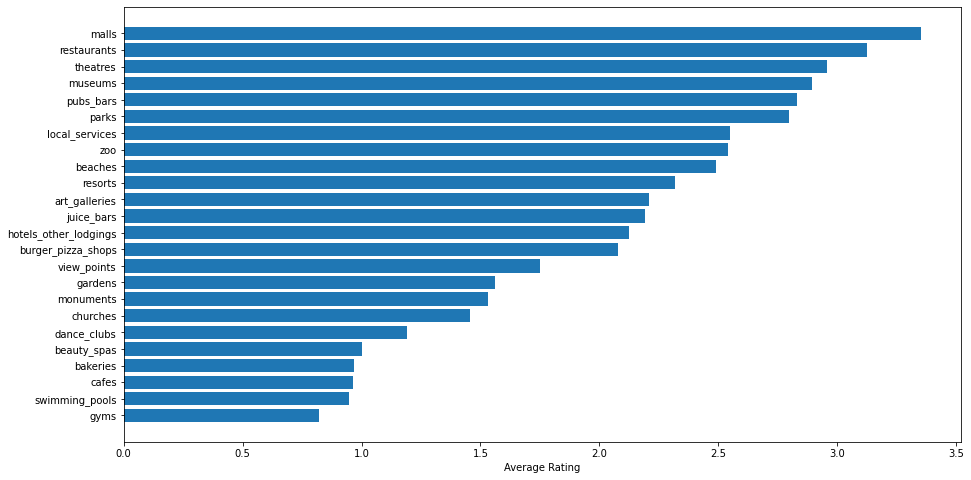

In [30]:
##Interpretation: Bakeries has least number of reviews.

bar = df_popularity_table.sort_values(by=['Average Rating'],ascending=True)

# Barplot based on average rating
plt.figure(figsize=(15,8))
plt.barh(bar.index, bar['Average Rating'])
plt.xlabel('Average Rating')

Interpretation: Malls are has highest rating and Gyms has least rating,so people prefer mall compared to gyms.

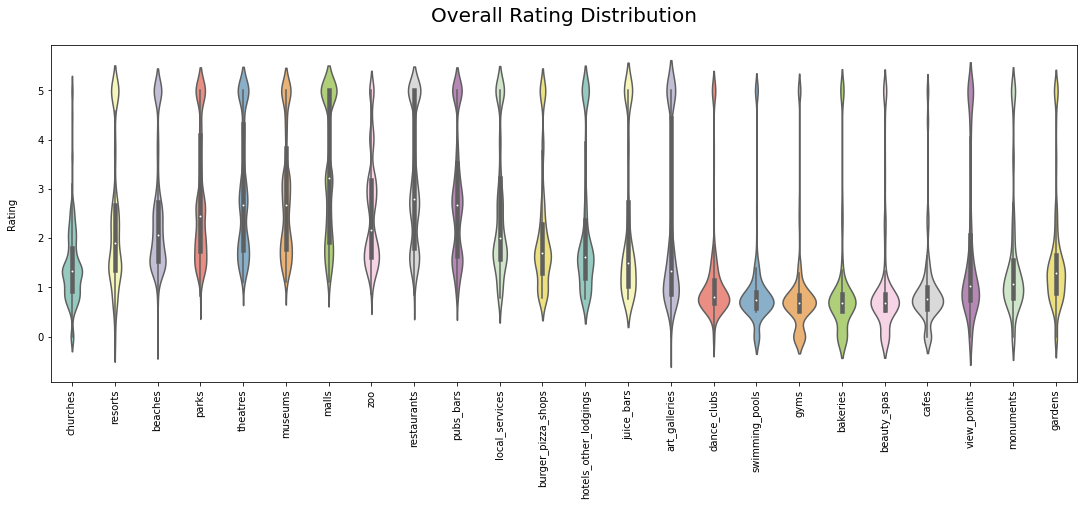

In [31]:
# Overall Rating Distribution
df_transform = pd.melt(df_review,value_vars=['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'])

fig = plt.figure(figsize = (15,7))
g = sns.violinplot(x='variable',y='value',data=df_transform,palette = 'Set3')
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title(f'Overall Rating Distribution',y=1.05,fontsize=20)
g.set_xlabel("")
g.set_ylabel("Rating",labelpad = 20)
fig.tight_layout(pad = 0.5)

Interpretation:
Overall rating are lying between 0.5 to 5 stars
Some attractions have wide-range of rating distribution (suchas pubs/bars, restaurants,malls) since they are common attraction point where most of tourist must visit
On the other hand, some attractions such as gyms, bakeries, swimming pools,beauty_spas have relatively low rating. Since most of the users might not visit often to all these places.
Since we don't have enough information about attraction itself or descriptive user reivews, In this notebook we'll focus on segmenting user into different cluster based on their preferences

In [32]:
# Scaling the data using Standard scaler

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = ss.fit_transform(df_review)
df_scaled = pd.DataFrame(df_scaled,columns=df_review.columns)
df_scaled.shape

(5456, 24)

In [33]:
df_scaled.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
1,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.139750,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
2,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
3,-1.759118,-1.280305,0.914217,0.636432,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
4,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223


## **MODEL1- HIERARCHICAL CLUSTERING**

In [34]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

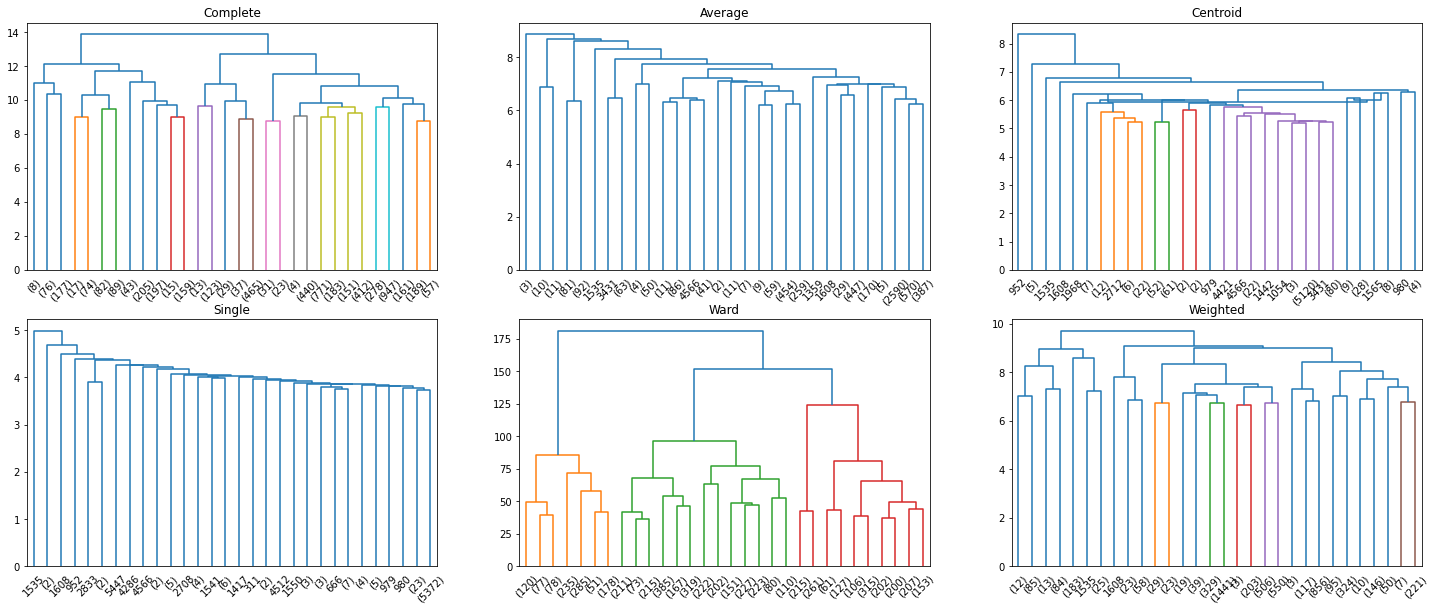

In [35]:
fig, axes = plt.subplots(2, 3,  figsize=(25,10))

mergings = linkage(df_scaled,method='complete',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,0])
axes[0,0].set_title('Complete')

mergings = linkage(df_scaled,method='average',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,1])
axes[0,1].set_title('Average')

mergings = linkage(df_scaled,method='centroid',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,2])
axes[0,2].set_title('Centroid')

mergings = linkage(df_scaled,method='single',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,0])
axes[1,0].set_title('Single')

mergings = linkage(df_scaled,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,1])
axes[1,1].set_title('Ward')

mergings = linkage(df_scaled,method='weighted',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,2])
axes[1,2].set_title('Weighted')

plt.show()

Interpretation :
Complete gives lot of cluster.
Single,Centroid and Weighted has overlap.
Ward as Method number cluster will be 5.

In [36]:
mergings = linkage(df_scaled,method='ward',metric='euclidean')
clustercut = pd.Series(cut_tree(mergings,n_clusters=5).reshape(-1,))
clustercut.value_counts()

1    1371
0    1370
2    1215
3    1024
4     476
dtype: int64

In [37]:
# Grouping Category 

df_category_reviews = pd.DataFrame(columns = ['Entertainment', 'Food_Service', 'Accommodation', 'Historical_Place', 'Scenic_Beauty', 'Additional_Services','Cluster'])
df_category_reviews['Entertainment'] = (df_review['theatres']+df_review['dance_clubs']+df_review['malls'])/15
df_category_reviews['Food_Service'] = (df_review['restaurants']+df_review['pubs_bars']+df_review['burger_pizza_shops']+df_review['juice_bars']+df_review['bakeries']+df_review['cafes'])/30
df_category_reviews['Accommodation'] = (df_review['hotels_other_lodgings']+df_review['resorts'])/10
df_category_reviews['Historical_Place'] = (df_review['churches']+df_review['museums']+ df_review['art_galleries']+df_review['monuments'])/20
df_category_reviews['Scenic_Beauty'] = (df_review['beaches']+df_review['parks']+ df_review['zoo']+df_review['view_points']+df_review['gardens'])/25
df_category_reviews['Additional_Services'] = (df_review['local_services']+df_review['swimming_pools']+ df_review['gyms']+df_review['beauty_spas'])/20
df_category_reviews['Cluster'] = clustercut

In [38]:
# Profiling
df_category_reviews.groupby('Cluster').mean()

,Entertainment,Food_Service,Accommodation,Historical_Place,Scenic_Beauty,Additional_Services
Cluster,,,,,,
0,0.592386,0.365086,0.478468,0.403891,0.425675,0.190413
1,0.508061,0.461237,0.367295,0.367363,0.393433,0.253381
2,0.541059,0.353103,0.461281,0.430445,0.591912,0.267998
3,0.389167,0.373611,0.435572,0.457594,0.459052,0.361765
4,0.346905,0.563090,0.545725,0.331188,0.250018,0.309734


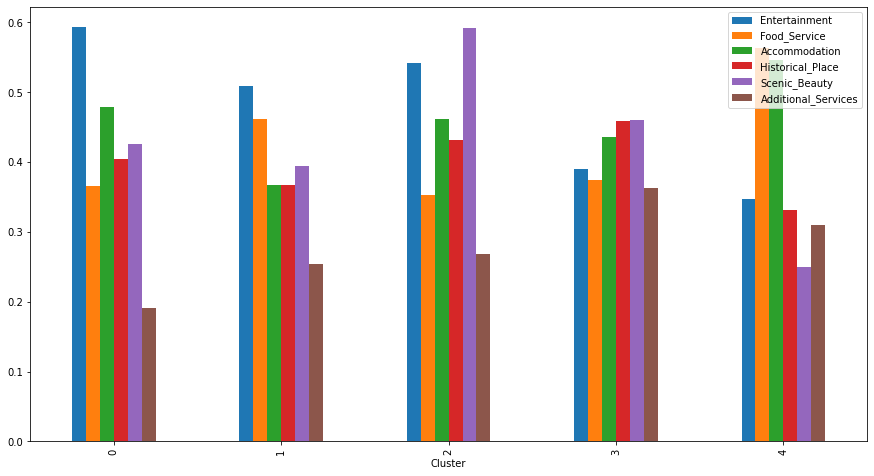

In [39]:
df_category_reviews.groupby('Cluster').mean().plot.bar()
plt.legend(loc='best')
plt.show()

# Interpretation:


*   Cluster 0 : These People dont like additional service and most perfered thing is entertainment.
*  Cluster 1 : These People like Food service and entertainment more and have less interest in Additional Service

*   Cluster 2 : These People like Scenic_Beauty like beaches,parks,zoo,view_points and Entertainment and have less interest in Additional Service.

*  Cluster 3 : These People like Scenic_Beauty and Historical places and have least interest in Additional Service.However, Additional Service is more as compared to other two clusters.

*  Cluster 4 : These People like Food Service and Accommodation and have least interest in Scenic_Beauty.



# **MODEL2- KMEANS CLUSTERING**

In [40]:
from sklearn.cluster import KMeans

In [41]:
#Optimal Value of K Using Elbow Plot

wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

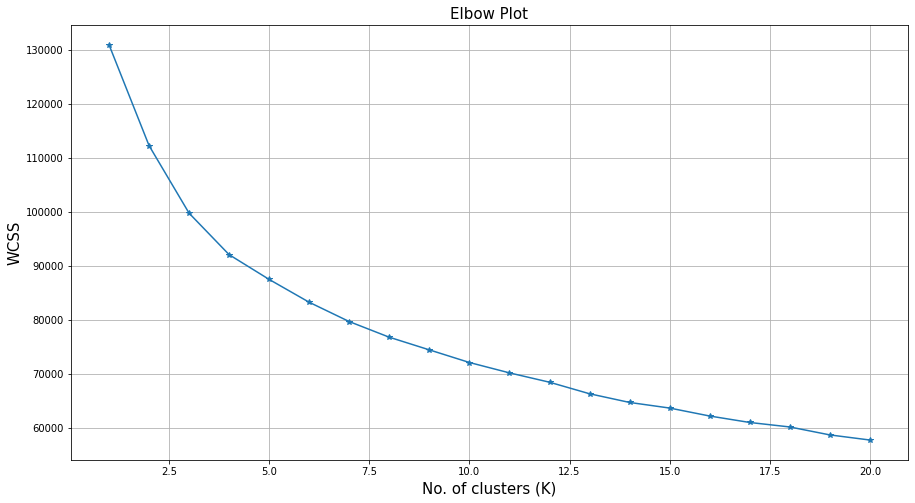

In [42]:
plt.figure(figsize=(15,8))
plt.plot(range(1,21), wcss,marker='*')
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.grid(True)
plt.show()

Interpretation:
Best k=5 where eblow is formed
Optimal Value of K Using Silhouette Score

In [43]:
from sklearn.metrics import silhouette_score, silhouette_samples
n_clusters = [2, 3, 4, 5, 6]
sscore= []

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {}".format(K, score))
    sscore.append(score)

For 2 clusters the silhouette score is 0.15327567879929535
For 3 clusters the silhouette score is 0.14546577952300482
For 4 clusters the silhouette score is 0.1443990757688245
For 5 clusters the silhouette score is 0.15066349010628652
For 6 clusters the silhouette score is 0.1384981337512296


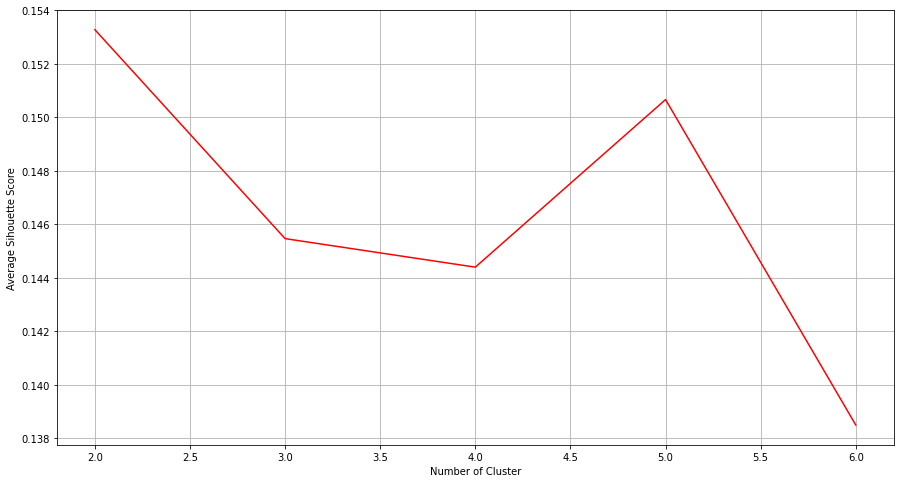

In [44]:
plt.figure(figsize=(15,8))
plt.plot(n_clusters,sscore,'r')
plt.xlabel('Number of Cluster')
plt.ylabel('Average Sihouette Score')
plt.grid(True)
plt.show()

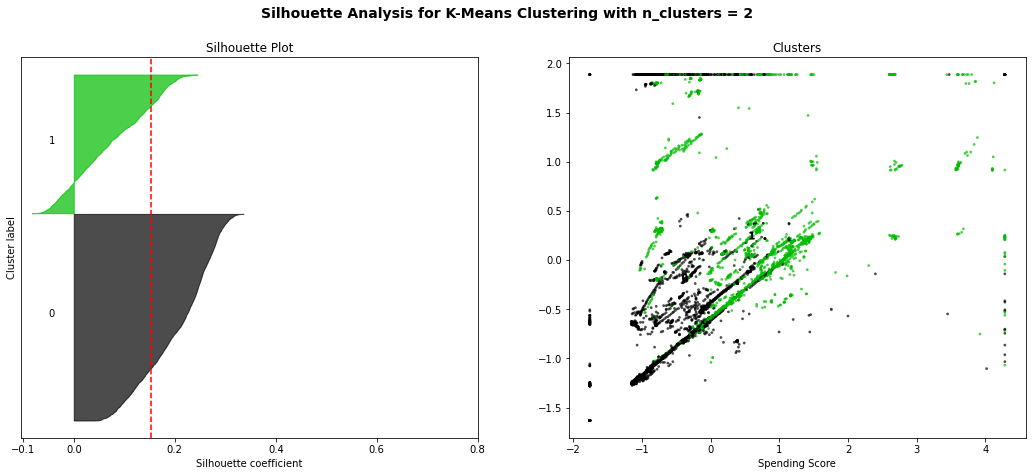

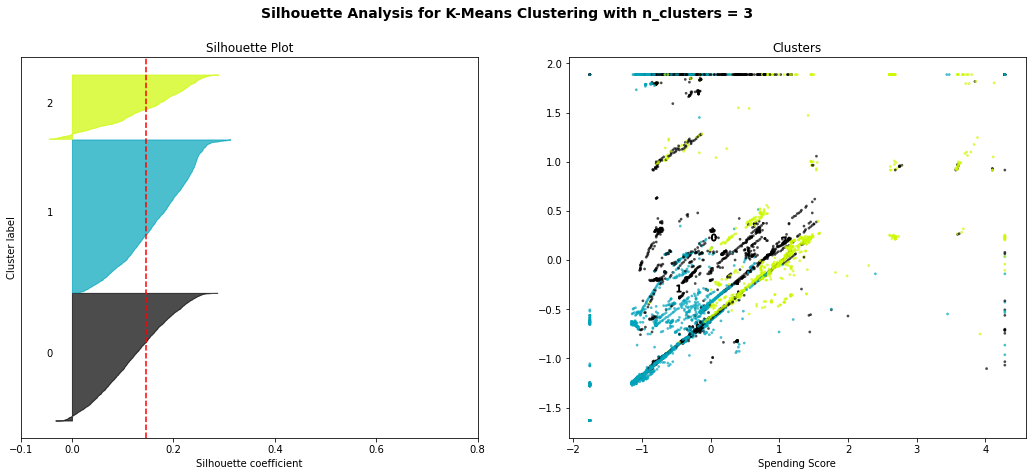

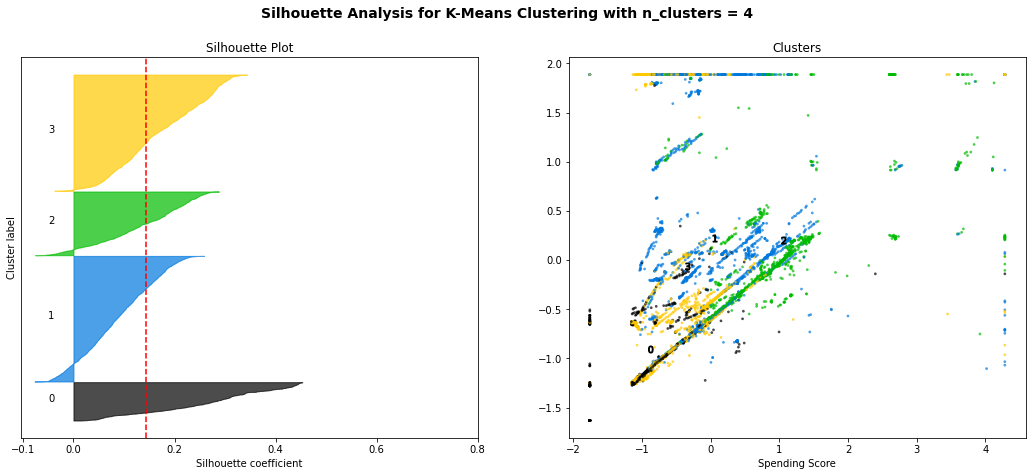

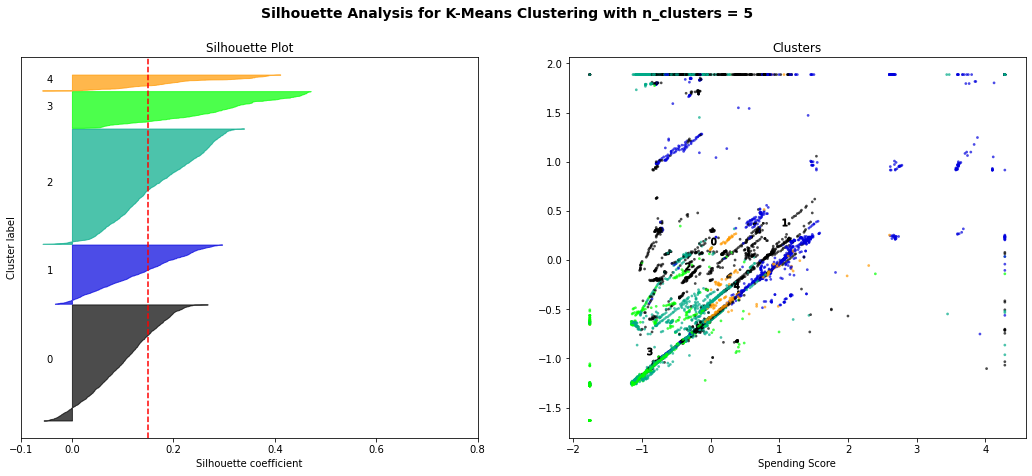

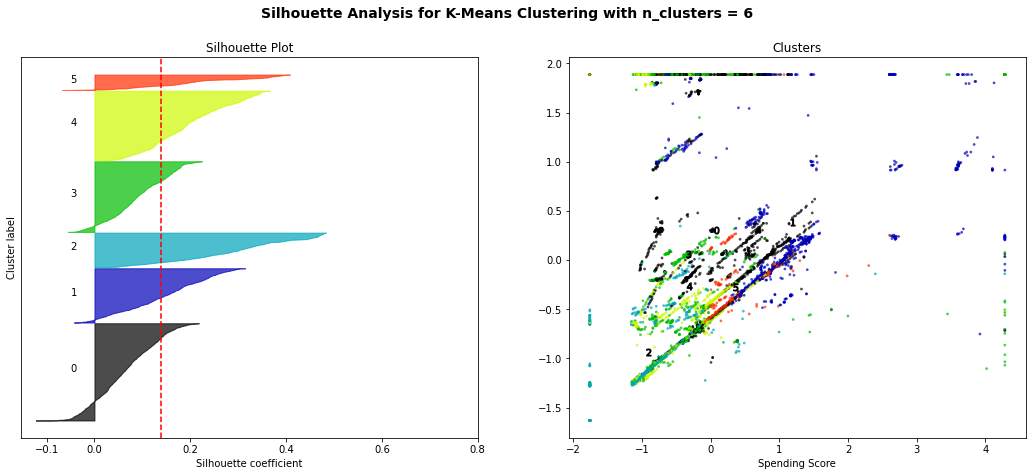

In [45]:
# visualize the silhoutte scores

import matplotlib.cm as cm
n_clusters = [2, 3, 4, 5, 6]

X = np.array(df_scaled)

for K in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    model = KMeans(n_clusters = K, random_state = 10)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = model.cluster_centers_
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')
plt.show()

# Interpretation:
Cluster 5 has less dense MissClassification compared to others.

In [46]:
kmeans = KMeans(n_clusters=5,random_state=4)
kmeans.fit(df_scaled)

KMeans(n_clusters=5, random_state=4)

In [47]:
# value-counts for the cluster
cl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
cl.value_counts()

Cluster
1          1845
2          1833
0           941
3           584
4           253
dtype: int64

In [48]:
df_final = df_review.copy()
df_final = pd.concat([df_final,cl],1)

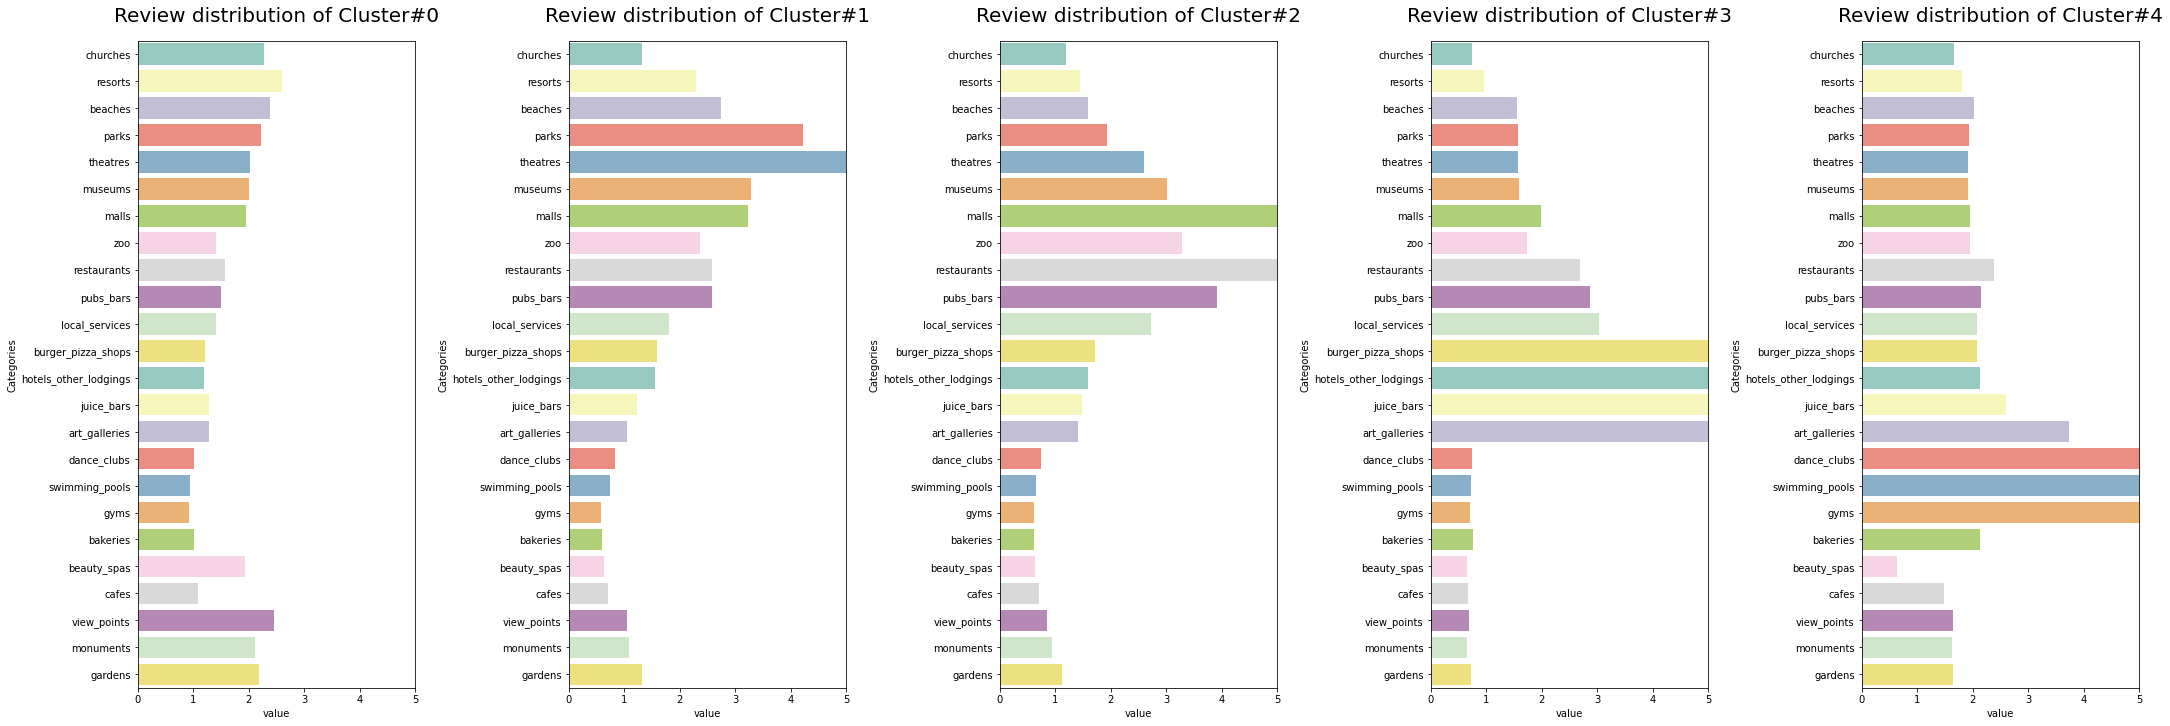

In [49]:
df_long = pd.melt(df_final, "Cluster", var_name="categories")

fig = plt.figure(figsize = (30,10))
for i in range(len(df_long.Cluster.unique())):
    plt.subplot(1,len(df_long.Cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['Cluster']==i],palette='Set3',ci=None,estimator=np.median)
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)

Interpretation:
* -Cluster0 are people who like most of the category as similar.
* -Cluster1 are people who like museums,parks,malls and theatres.
* -Cluster2 are people who like malls and restaurants.
* -Cluster3 are people who like burger shop,hotels and art galleries.
* -Cluster4 are people who like gyms,swimming pool and dance_clubs.

# **PCA**

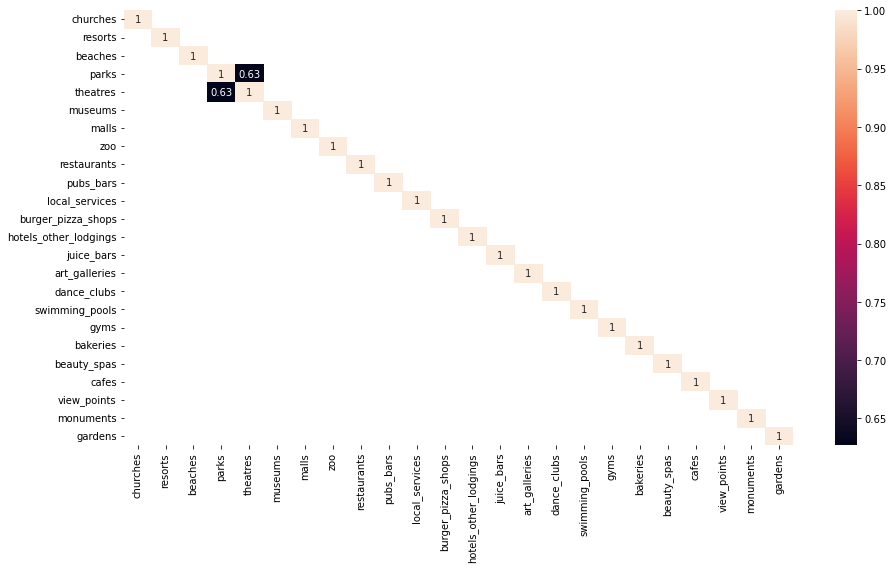

In [50]:
sns.heatmap(df_review.corr()[df_review.corr() >= 0.6],annot=True)
plt.show()

In [51]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

In [52]:
pca.explained_variance_  # To get the eigen values

array([4.71937538, 3.49445892, 1.84974586, 1.59783151, 1.26464842,
       1.14250103, 1.06849962, 0.99582028, 0.78408629, 0.71400281,
       0.64137521, 0.60519076, 0.57895021, 0.51687305, 0.51028157,
       0.46619429, 0.44402336, 0.43867407, 0.42938291, 0.40050874,
       0.37397306, 0.34724672, 0.33015445, 0.2906011 ])

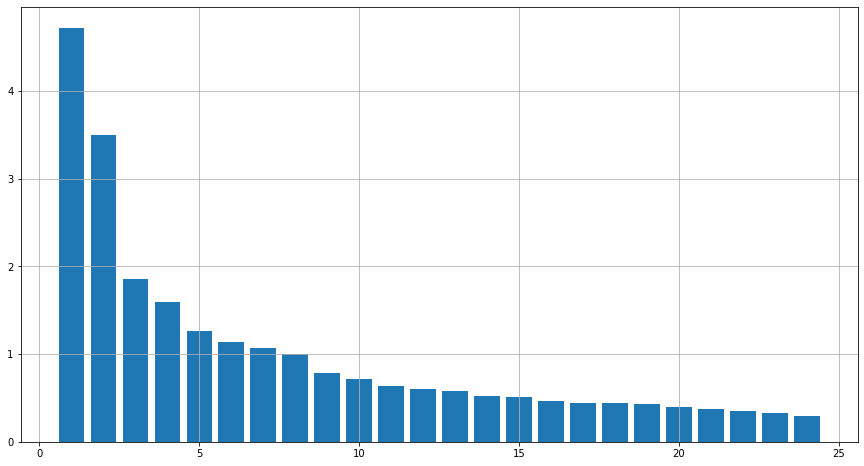

In [53]:
plt.bar(range(1,25),pca.explained_variance_)
plt.grid(True)
plt.show()

In [54]:
pca.explained_variance_ratio_  # proportion accounted


array([0.1966046 , 0.14557577, 0.07705862, 0.06656411, 0.05268403,
       0.04759548, 0.04451266, 0.04148491, 0.03266427, 0.02974466,
       0.02671907, 0.02521166, 0.0241185 , 0.02153243, 0.02125783,
       0.0194212 , 0.01849758, 0.01827474, 0.01788768, 0.01668481,
       0.01557935, 0.01446596, 0.01375391, 0.01210616])

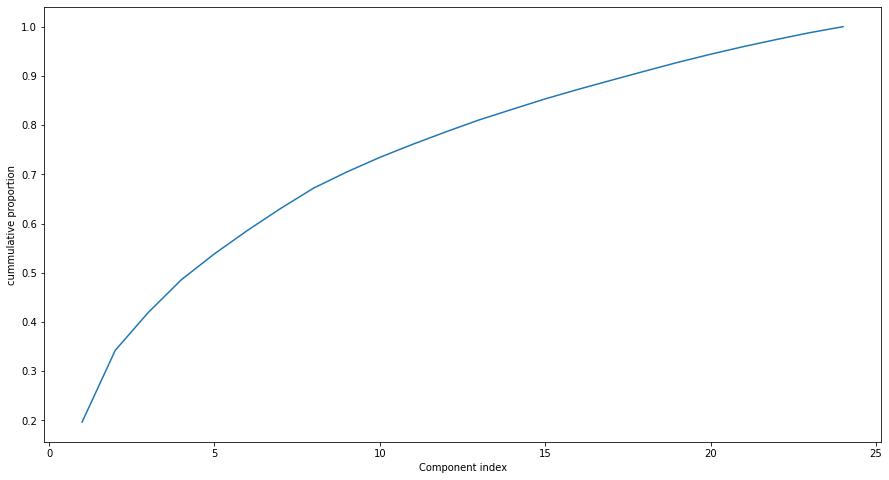

In [55]:
plt.plot(range(1,25),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component index')
plt.ylabel('cummulative proportion')
plt.show()

Interpretation:

* The above output shows that 21 components are accounting for >=95 % of variation in the data.

In [56]:
pca = PCA(0.95)
pca.fit(df_scaled)

PCA(n_components=0.95)

In [57]:
pca.explained_variance_

array([4.71937538, 3.49445892, 1.84974586, 1.59783151, 1.26464842,
       1.14250103, 1.06849962, 0.99582028, 0.78408629, 0.71400281,
       0.64137521, 0.60519076, 0.57895021, 0.51687305, 0.51028157,
       0.46619429, 0.44402336, 0.43867407, 0.42938291, 0.40050874,
       0.37397306])

In [58]:
pca.components_   # this is the eigen vector

array([[ 2.85704807e-01,  1.11081997e-01,  1.31999023e-01,
         1.09534609e-01,  5.06929108e-02, -8.22454274e-02,
        -2.59066472e-01, -2.68606780e-01, -2.97655705e-01,
        -2.91052382e-01, -2.27373962e-01, -1.77452453e-01,
        -1.45983690e-01, -1.43140618e-01, -8.82409960e-02,
         9.35039111e-02,  1.54753749e-01,  1.75563710e-01,
         1.80712096e-01,  1.93073446e-01,  2.62249274e-01,
         2.76669210e-01,  2.69003083e-01,  2.66074206e-01],
       [-4.11657710e-02, -1.46962750e-01, -2.39261104e-01,
        -3.40488989e-01, -3.76450840e-01, -3.32942997e-01,
        -1.26765334e-01, -1.24636589e-01, -5.46307101e-02,
        -5.36317582e-02,  5.13428872e-02,  2.13073291e-01,
         2.27763369e-01,  2.96155131e-01,  2.47156150e-01,
         1.12052980e-01,  2.40651195e-01,  2.85247939e-01,
         2.62344643e-01,  1.49833675e-01,  7.77275647e-02,
        -8.81103659e-02, -7.54283919e-02, -4.67629498e-02],
       [-1.63507739e-01,  7.14419808e-03,  2.28043375e

In [59]:
pca.components_.shape


(21, 24)

Interpretation:

* As the Feature has just decreased to 24 to 21,Not Building a Model with PCA Components.

# **MODEL3 -DBSCAN**

In [60]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=48)
nn = nn.fit(df_scaled)
distances,indices= nn.kneighbors(df_scaled)

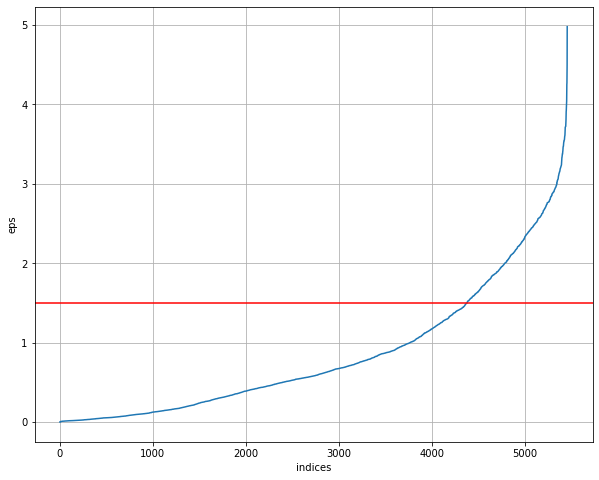

In [61]:
plt.figure(figsize=(10,8))
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.xlabel('indices')
plt.ylabel('eps')
plt.plot(distances)
plt.axhline(1.5,color='r')
plt.grid(True)
plt.show()

Interpretation:
* Best eps=1.5 where eblow is formed

In [62]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5,min_samples=48) 
dbscan.fit(df_scaled)

DBSCAN(eps=1.5, min_samples=48)

In [63]:
lbl = pd.DataFrame(dbscan.labels_,columns=['Cluster'])

lbl.value_counts()

Cluster
-1         5100
 0          129
 1          117
 2           55
 3           55
dtype: int64

Interpretation:
* Lot of outlier present in that data denoted by -1.

# **Recommendation System**


Approach1: Popularity Based Recommendation

In [64]:
df_review.mean()

churches                 1.455720
resorts                  2.319707
beaches                  2.489331
parks                    2.796886
theatres                 2.958941
museums                  2.893490
malls                    3.351395
zoo                      2.540795
restaurants              3.126019
pubs_bars                2.832729
local_services           2.549971
burger_pizza_shops       2.078339
hotels_other_lodgings    2.125511
juice_bars               2.190861
art_galleries            2.206573
dance_clubs              1.192801
swimming_pools           0.949203
gyms                     0.822414
bakeries                 0.969811
beauty_spas              1.000071
cafes                    0.965838
view_points              1.750537
monuments                1.531453
gardens                  1.560755
dtype: float64

In [65]:
df_popularity_table = pd.DataFrame(df_review.mean(),columns=['Average Rating'])
df_popularity_table.head()

,Average Rating
churches,1.455720
resorts,2.319707
beaches,2.489331
parks,2.796886
theatres,2.958941


In [66]:
df_popularity_table['TotalRatingCount'] = df_review.astype(bool).sum(axis=0).values
df_popularity_table

,Average Rating,TotalRatingCount
churches,1.455720,5261
resorts,2.319707,5366
beaches,2.489331,5452
parks,2.796886,5456
theatres,2.958941,5456
museums,2.893490,5456
malls,3.351395,5456
zoo,2.540795,5456
restaurants,3.126019,5456
pubs_bars,2.832729,5456


In [67]:
df_popularity_table.sort_values(by=['Average Rating','TotalRatingCount'],ascending=False).head()

,Average Rating,TotalRatingCount
malls,3.351395,5456
restaurants,3.126019,5456
theatres,2.958941,5456
museums,2.893490,5456
pubs_bars,2.832729,5456


Interpretation:

* For a New Visitor to Europe, Top 5 place he/she can visits are malls,restaurants,theatres,museums,pubs_bars.



# **Collaborative Filtering Recommendation System.**
* Approach 2: Matrix Based

In [78]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 6.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626490 sha256=1dc959fa9c0c7115abce0309e4f43b6d41f37f0d2ee20e450cd2fa6d06a3ddbd
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [80]:
from surprise import Dataset,Reader
from surprise import SVDpp

In [79]:
df_coll_filt_data = df.set_index('User', append=True).stack().reset_index().rename(columns={0:'rating', 'level_2':'Category'}).drop('level_0',1)
df_coll_filt_data .head(30)

,User,Category,rating
0,User 1,churches,0.00
1,User 1,resorts,0.00
2,User 1,beaches,3.63
3,User 1,parks,3.65
4,User 1,theatres,5.00
5,User 1,museums,2.92
6,User 1,malls,5.00
7,User 1,zoo,2.35
8,User 1,restaurants,2.33
9,User 1,pubs_bars,2.64


In [70]:
# dataset info
df_coll_filt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130944 entries, 0 to 130943
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User      130944 non-null  object 
 1   Category  130944 non-null  object 
 2   rating    130944 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


In [81]:
reader = Reader(rating_scale=(1,5))  # rating scale

rating_data = Dataset.load_from_df(df_coll_filt_data[['User','Category','rating']],reader)

trainsetfull = rating_data.build_full_trainset()
print('Number of user:',trainsetfull.n_users)
print('Number of items:',trainsetfull.n_items)

Number of user: 5456
Number of items: 24


In [82]:
algo = SVDpp(random_state=4)  
algo.fit(trainsetfull)

In [73]:
item_id = df_coll_filt_data['Category'].unique()
item_id

array(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms',
       'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments',
       'gardens'], dtype=object)

In [74]:
test_set = [['User 50',iid,4] for iid in item_id]
test_set

[['User 50', 'churches', 4],
 ['User 50', 'resorts', 4],
 ['User 50', 'beaches', 4],
 ['User 50', 'parks', 4],
 ['User 50', 'theatres', 4],
 ['User 50', 'museums', 4],
 ['User 50', 'malls', 4],
 ['User 50', 'zoo', 4],
 ['User 50', 'restaurants', 4],
 ['User 50', 'pubs_bars', 4],
 ['User 50', 'local_services', 4],
 ['User 50', 'burger_pizza_shops', 4],
 ['User 50', 'hotels_other_lodgings', 4],
 ['User 50', 'juice_bars', 4],
 ['User 50', 'art_galleries', 4],
 ['User 50', 'dance_clubs', 4],
 ['User 50', 'swimming_pools', 4],
 ['User 50', 'gyms', 4],
 ['User 50', 'bakeries', 4],
 ['User 50', 'beauty_spas', 4],
 ['User 50', 'cafes', 4],
 ['User 50', 'view_points', 4],
 ['User 50', 'monuments', 4],
 ['User 50', 'gardens', 4]]

In [83]:
pred = algo.test(test_set)

In [84]:
rec = pd.DataFrame(pred).sort_values(by='est',ascending=False)
rec.head(5)

,uid,iid,r_ui,est,details
21,User 50,view_points,4,3.985716,{'was_impossible': False}
2,User 50,beaches,4,3.354185,{'was_impossible': False}
22,User 50,monuments,4,3.267731,{'was_impossible': False}
1,User 50,resorts,4,3.224506,{'was_impossible': False}
0,User 50,churches,4,2.675006,{'was_impossible': False}


Interpretation:

* For a User Number 50, Top 5 place he/she can visits are viewpoints,beaches,monuments,resorts,churches.
**Evaluating the Model**

In [85]:
from surprise.model_selection import train_test_split
[trainset,testset] = train_test_split(rating_data,test_size=0.3,random_state=4)
algo = SVDpp(random_state=4)
algo.fit(trainset)

In [86]:
test_pred= algo.test(testset)

tp = pd.DataFrame(test_pred)
tp.head()


,uid,iid,r_ui,est,details
0,User 3942,theatres,5.00,3.408195,{'was_impossible': False}
1,User 2108,beauty_spas,0.73,1.504572,{'was_impossible': False}
2,User 3445,burger_pizza_shops,0.92,1.634615,{'was_impossible': False}
3,User 2314,swimming_pools,0.53,1.000000,{'was_impossible': False}
4,User 479,juice_bars,1.46,1.776674,{'was_impossible': False}


In [87]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(tp['r_ui'],tp['est']))
print('RMSE on Test',rmse)

RMSE on Test 1.1227257650081424


**Conclusion**
 
 We used cluster analysis such as k-means,hierarichal and DBscan algorithms to find cluster which user belongs to based on ratings provided.

we have done the recommondation systems such as popularity and collabarative filtering
* Evaluation of model is done throught finding rmse of test data